# Rastreios / Cancer tracking data in PT

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('rastreios-oncologicos.geojson') as f:
        raw=json.load(f)

tmp1=pd.json_normalize(raw, record_path='features') #, meta=['type', 'geomtery', 'coordinates','contagem_de_utentes_inscritos_com_rastreio_do_cancro_do_colon_e_reto_efetuado','tempo','proporcao_utentes_50_75_a_c_rastreio_cancro_cr', 'aces', 'geo', 'cont_mulher', '25-60' ])

In [3]:
tmp1.to_csv('rastreios.csv')

In [4]:
raw2=pd.read_csv('rastreios.csv', names=['Unnamed: 0', 'type', 'geometry.type', 'geometry.coordinates',
       'Região',
       'Mulheres_com_colpocitologia_atualizada',
       'Utentes_inscritos_com_rastreio_do_cancro_do_colon_e_reto_efetuado',
       'Tempo',
       'Proporcao_utentes_50_75_a_c_rastreio_cancro_cr',
       'Proporcao_mulheres_50_70_a_c_mamogr_2_anos',
       'Aces', 'Localizacao_geografica',
       'Mulheres_com_registo_de_mamografia_nos_ultimos_dois_anos',
       'Proporcao_mulheres_25_60_a_c_colpoc_atuali'],)

In [5]:
tmp2=raw2.drop(['Unnamed: 0', 'type', 'geometry.type', 'geometry.coordinates'], axis=1)

In [6]:
tmp3=tmp2.drop(0)

In [7]:
tmp3['Latitude']=tmp3['Localizacao_geografica'].apply(lambda x: float(x[1:].split(',')[0]))

In [8]:
tmp3['Longitude']=tmp3['Localizacao_geografica'].apply(lambda x: float(x.split(',')[1][:-1]))

In [9]:
tmp4=tmp3.drop('Localizacao_geografica', axis=1)

In [10]:
tmp4['Mes']=pd.to_datetime(tmp4['Tempo'])

In [11]:
tmp5=tmp4.drop('Tempo',axis=1)

In [12]:
tmp5['Nr_colpocitologia']=tmp5['Mulheres_com_colpocitologia_atualizada'].apply(lambda x:int(x))
tmp5['Nr_colon_recto_efectuado']=tmp5['Utentes_inscritos_com_rastreio_do_cancro_do_colon_e_reto_efetuado'].apply(lambda x:int(x))
tmp5['Nr_mamografias']=tmp5['Mulheres_com_registo_de_mamografia_nos_ultimos_dois_anos'].apply(lambda x:int(x))

In [13]:
tmp6=tmp5.drop(['Mulheres_com_colpocitologia_atualizada','Utentes_inscritos_com_rastreio_do_cancro_do_colon_e_reto_efetuado', 'Mulheres_com_registo_de_mamografia_nos_ultimos_dois_anos'],axis=1)

In [14]:
#tmp6[['Proporcao_utentes_50_75_a_c_rastreio_cancro_cr','Proporcao_mulheres_50_70_a_c_mamogr_2_anos','Proporcao_mulheres_25_60_a_c_colpoc_atuali']].apply(lambda x:float(x))
tmp6['P_ut50_75_rastreio_CCR']=tmp6['Proporcao_utentes_50_75_a_c_rastreio_cancro_cr'].apply(lambda x:float(x))
tmp6['P_m_50_70_mamog']=tmp6['Proporcao_mulheres_50_70_a_c_mamogr_2_anos'].apply(lambda x:float(x))
tmp6['P_m_25_60_CC']=tmp6['Proporcao_mulheres_25_60_a_c_colpoc_atuali'].apply(lambda x:float(x))

In [15]:
tmp7=tmp6.drop(['Proporcao_utentes_50_75_a_c_rastreio_cancro_cr','Proporcao_mulheres_50_70_a_c_mamogr_2_anos','Proporcao_mulheres_25_60_a_c_colpoc_atuali'], axis=1)

In [16]:
tmp7

,Região,Aces,Latitude,Longitude,Mes,Nr_colpocitologia,Nr_colon_recto_efectuado,Nr_mamografias,P_ut50_75_rastreio_CCR,P_m_50_70_mamog,P_m_25_60_CC
1,Região de Saúde do Alentejo,ACES Alentejo Litoral,38.384136,-8.513203,2014-01-01,6415,1790,2404,5.86193,18.27998,29.18562
2,Região de Saúde do Centro,ACES Pinhal Litoral,39.749533,-8.807683,2014-01-01,15718,16765,15003,20.75647,42.35743,23.40730
3,Região de Saúde LVT,ACES Almada-Seixal,38.667852,-9.187578,2014-01-01,30072,25237,14075,23.59238,29.10463,32.73642
4,Região de Saúde LVT,ACES Arco Ribeirinho,38.667208,-9.054333,2014-01-01,13424,10193,7924,14.92234,26.15095,23.38920
5,Região de Saúde LVT,ACES Sintra,38.751921,-9.275364,2014-01-01,21855,18519,11740,18.21517,25.30336,22.09651
...,...,...,...,...,...,...,...,...,...,...,...
4268,Região de Saúde Norte,ACES Tâmega II - Vale do Sousa Sul,41.154815,-8.216377,2020-07-01,27722,38109,13037,70.03529,53.15800,61.30744
4269,Região de Saúde do Alentejo,ACES Alentejo Central,38.844203,-7.582662,2020-07-01,15574,13604,8034,24.99219,34.60544,40.80916
4270,Região de Saúde do Alentejo,ACES Alentejo Litoral,38.384136,-8.513203,2020-07-01,7330,7964,3043,25.13572,22.74630,34.23314
4271,Região de Saúde do Algarve,ACES Algarve III - Algarve Sotavento,37.383008,-7.729328,2020-07-01,6255,8508,2311,41.10343,27.49227,47.48349


In [17]:
newdf=tmp7

In [18]:
mean_by_region=newdf.groupby('Região').mean()

Text(0,0.5,'Nºcolpocitologias')

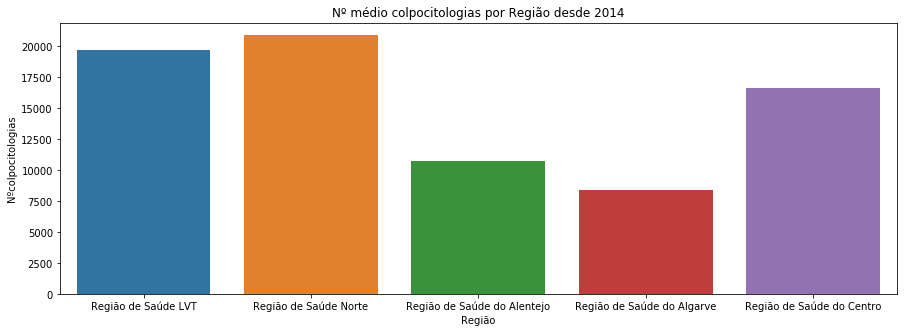

In [19]:
#mean_by_region.index
#['Nr_colpocitologia','Nr_colon_recto_efectuado','Nr_mamografias']])
plt.figure(figsize=[15,5])
ax=sns.barplot(x=mean_by_region.index, y=mean_by_region['Nr_colpocitologia'])
ax.set_title("Nº médio colpocitologias por Região desde 2014")
ax.set_ylabel("Nºcolpocitologias")

Text(0,0.5,'Nºmamografias')

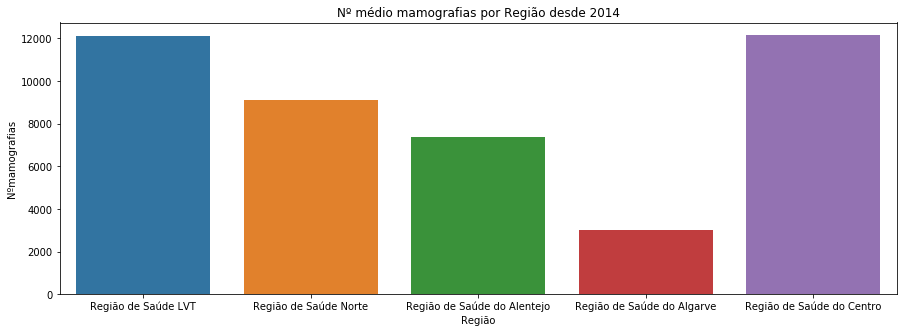

In [20]:
plt.figure(figsize=[15,5])
ax=sns.barplot(x=mean_by_region.index, y=mean_by_region['Nr_mamografias'])
ax.set_title("Nº médio mamografias por Região desde 2014")
ax.set_ylabel("Nºmamografias")

Text(0,0.5,'Nº rastreios')

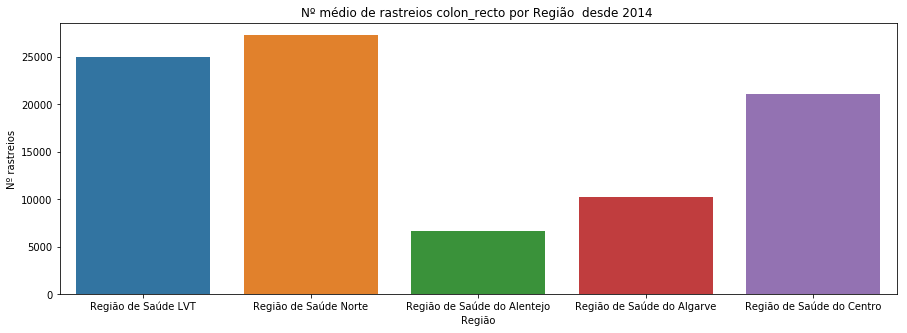

In [21]:
plt.figure(figsize=[15,5])
ax=sns.barplot(x=mean_by_region.index, y=mean_by_region['Nr_colon_recto_efectuado'])
ax.set_title("Nº médio de rastreios colon_recto por Região  desde 2014 ")
ax.set_ylabel("Nº rastreios")

Based on the tutorial:
    https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

Map extracted from:
    https://www.openstreetmap.org/export#map=7/39.414/-9.828
    

In [22]:
pt=plt.imread('D:\Gh_swag\map.png')

In [23]:
#BBox = ((newdf.Longitude.min(),newdf.Longitude.max(),newdf.Latitude.min(), newdf.Latitude.max()))

In [24]:
BBox=(-14.970,-4.687,36.385,42.317)

In [25]:
rast_2015own=newdf[newdf['Mes']>='2015'].groupby('Aces').mean()

In [26]:
rast_until2015=newdf[newdf['Mes']<'2015'].groupby('Aces').mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

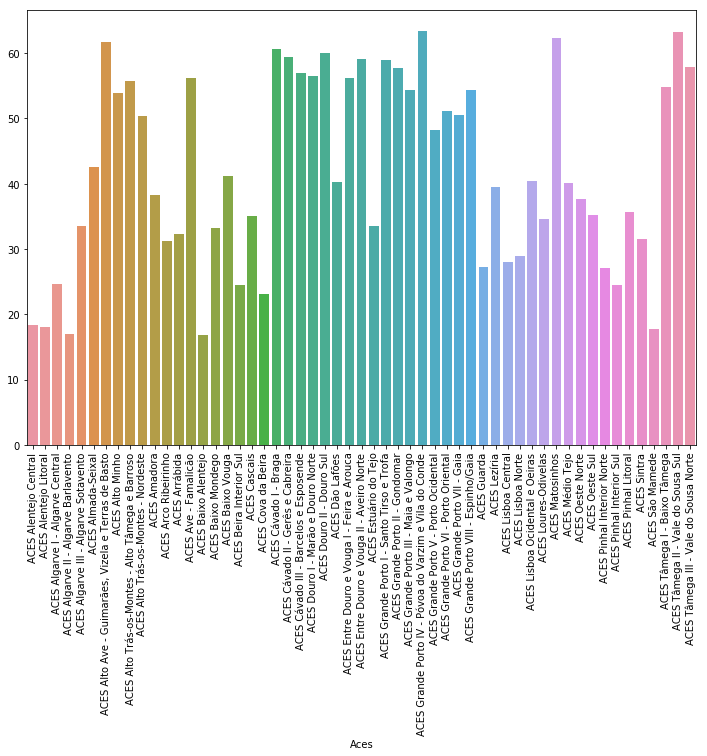

In [27]:
plt.figure(figsize=(12,8))

ax=sns.barplot(y=rast_2015own['P_ut50_75_rastreio_CCR'].values, x=rast_2015own['P_ut50_75_rastreio_CCR'].index)
plt.xticks(rotation=90)

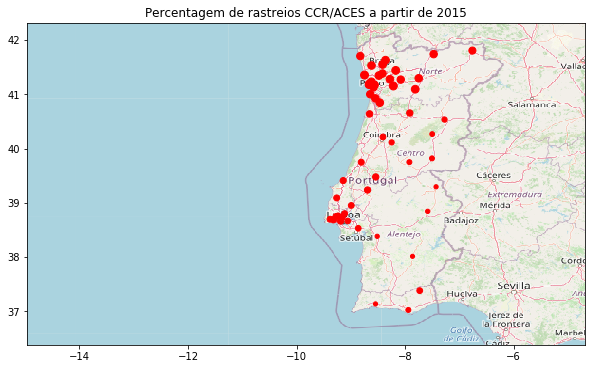

In [28]:
fig, ax=plt.subplots(figsize=(10,12))
ax.scatter(rast_2015own.Longitude, rast_2015own.Latitude, zorder=1,alpha=1,c='r', s=rast_2015own['P_ut50_75_rastreio_CCR'])
ax.set_title('Percentagem de rastreios CCR/ACES a partir de 2015')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(pt, zorder=0, extent=BBox, aspect='equal')
#(1-(rast_2015own['P_ut50_75_rastreio_CCR']/100))
#fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(newdf.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
#ax.set_title('Plotting Spatial Data on Riyadh Map')
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

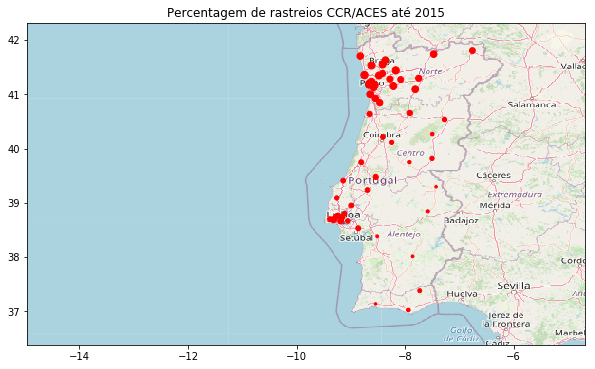

In [29]:
fig, ax=plt.subplots(figsize=(10,12))
ax.scatter(rast_until2015.Longitude, rast_until2015.Latitude, zorder=1,alpha=1,c='r', s=rast_until2015['P_ut50_75_rastreio_CCR'])
ax.set_title('Percentagem de rastreios CCR/ACES até 2015')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(pt, zorder=0, extent=BBox, aspect='equal')

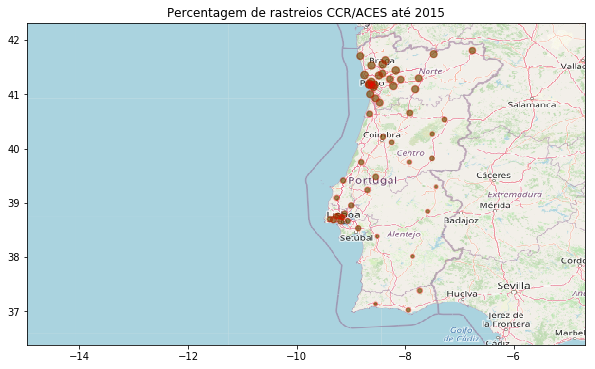

In [30]:
fig, ax=plt.subplots(figsize=(10,12))
ax.scatter(rast_until2015.Longitude, rast_until2015.Latitude, zorder=1,alpha=0.5,c='g', s=rast_until2015['P_ut50_75_rastreio_CCR'])
ax.scatter(rast_2015own.Longitude, rast_2015own.Latitude, zorder=1,alpha=0.3,c='r', s=rast_2015own['P_ut50_75_rastreio_CCR'])

ax.set_title('Percentagem de rastreios CCR/ACES até 2015')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(pt, zorder=0, extent=BBox, aspect='equal')

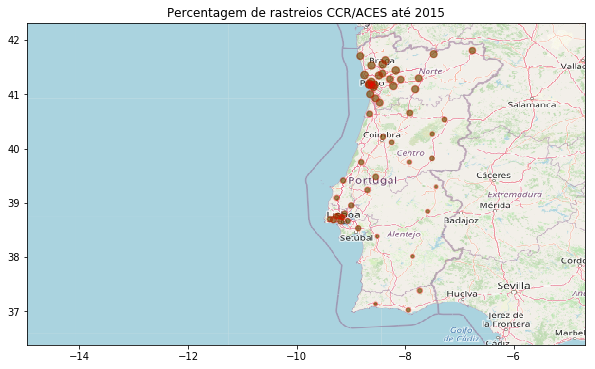

In [31]:
fig, ax=plt.subplots(figsize=(10,12))
ax.scatter(rast_until2015.Longitude, rast_until2015.Latitude, zorder=1,alpha=0.5,c='g', s=rast_until2015['P_ut50_75_rastreio_CCR'])
ax.scatter(rast_2015own.Longitude, rast_2015own.Latitude, zorder=1,alpha=0.3,c='r', s=rast_2015own['P_ut50_75_rastreio_CCR'])

ax.set_title('Percentagem de rastreios CCR/ACES até 2015')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(pt, zorder=0, extent=BBox, aspect='equal')

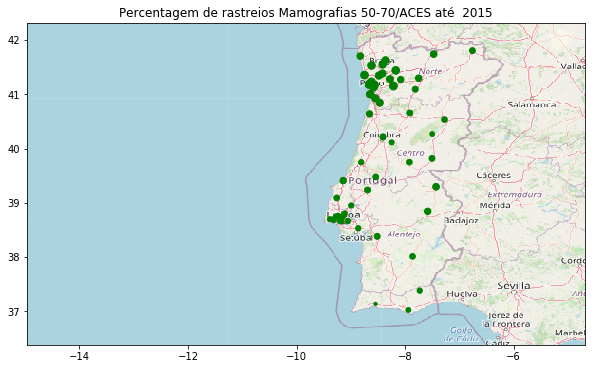

In [32]:
fig, ax=plt.subplots(figsize=(10,12))
ax.scatter(rast_until2015.Longitude, rast_until2015.Latitude, zorder=1,alpha=1,c='g', s=rast_until2015['P_m_25_60_CC'])

ax.set_title('Percentagem de rastreios Mamografias 50-70/ACES até  2015')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(pt, zorder=0, extent=BBox, aspect='equal')

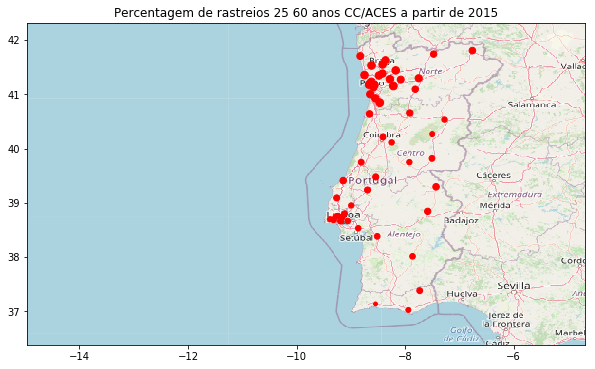

In [33]:
#'P_m_25_60_CC'
fig, ax=plt.subplots(figsize=(10,12))
ax.scatter(rast_2015own.Longitude, rast_2015own.Latitude, zorder=1,alpha=1,c='r', s=rast_2015own['P_m_25_60_CC'])
ax.set_title('Percentagem de rastreios 25 60 anos CC/ACES a partir de 2015')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(pt, zorder=0, extent=BBox, aspect='equal')

Text(0.5,1,'Nr_colpocitologia / ACES')

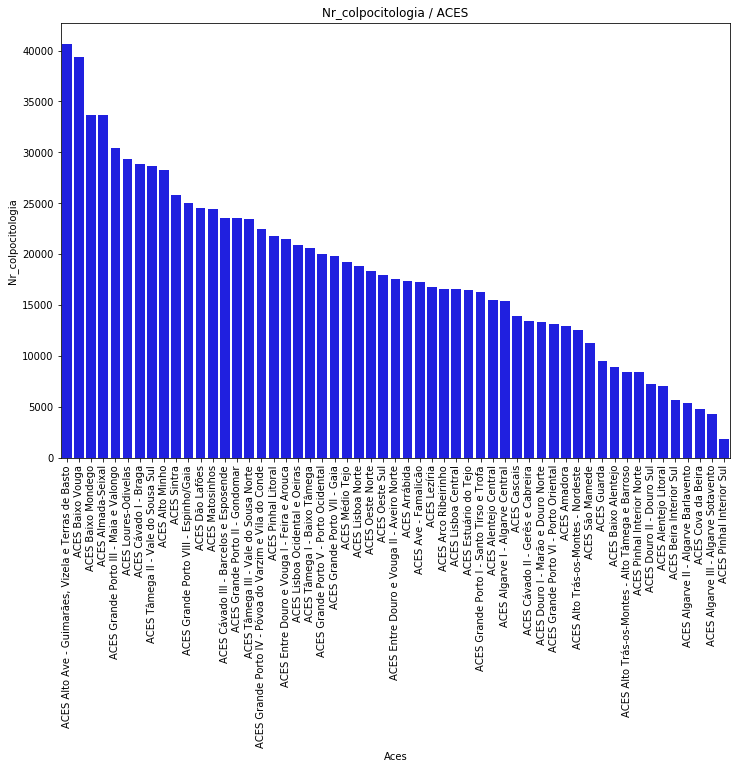

In [48]:
#newdf.groupby('Aces').mean()[['Nr_colpocitologia', 'Nr_colon_recto_efectuado', 'Nr_mamografias']]
plt.figure(figsize=(12,8))

ax=sns.barplot(y=newdf.groupby('Aces').mean()['Nr_colpocitologia'].sort_values(ascending=False), x=newdf.groupby('Aces').mean()['Nr_colpocitologia'].sort_values(ascending=False).index, color='b')
plt.xticks(rotation=90)
ax.set_title('Nr_colpocitologia / ACES')


Text(0.5,0,'ACES')

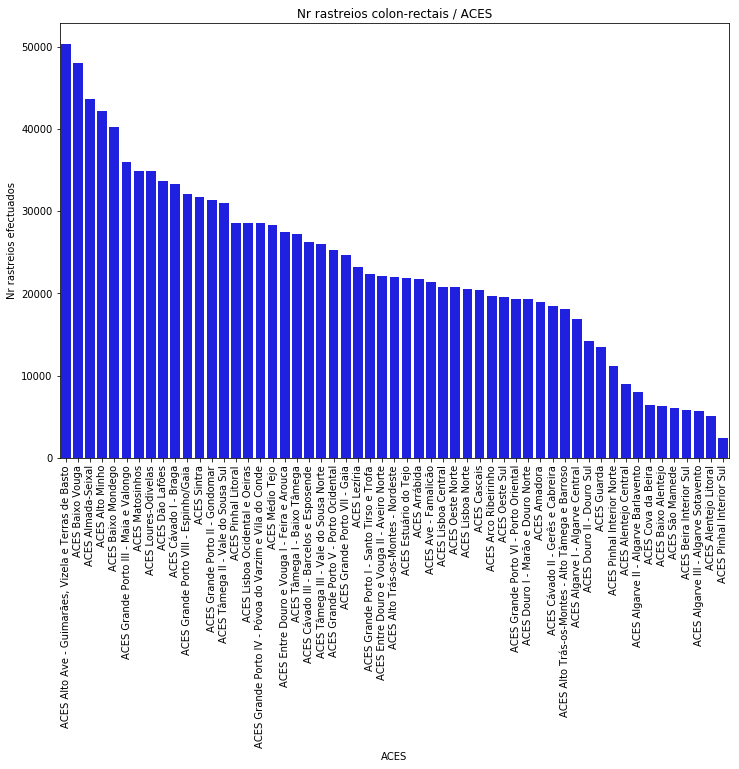

In [51]:
#newdf.groupby('Aces').mean()['Nr_colpocitologia'].sort_values()
plt.figure(figsize=(12,8))

ax=sns.barplot(y=newdf.groupby('Aces').mean()['Nr_colon_recto_efectuado'].sort_values(ascending=False), x=newdf.groupby('Aces').mean()['Nr_colon_recto_efectuado'].sort_values(ascending=False).index, color='b')
plt.xticks(rotation=90)
ax.set_title('Nr rastreios colon-rectais / ACES')
ax.set_ylabel('Nr rastreios efectuados')
ax.set_xlabel('ACES')

Text(0.5,0,'ACES')

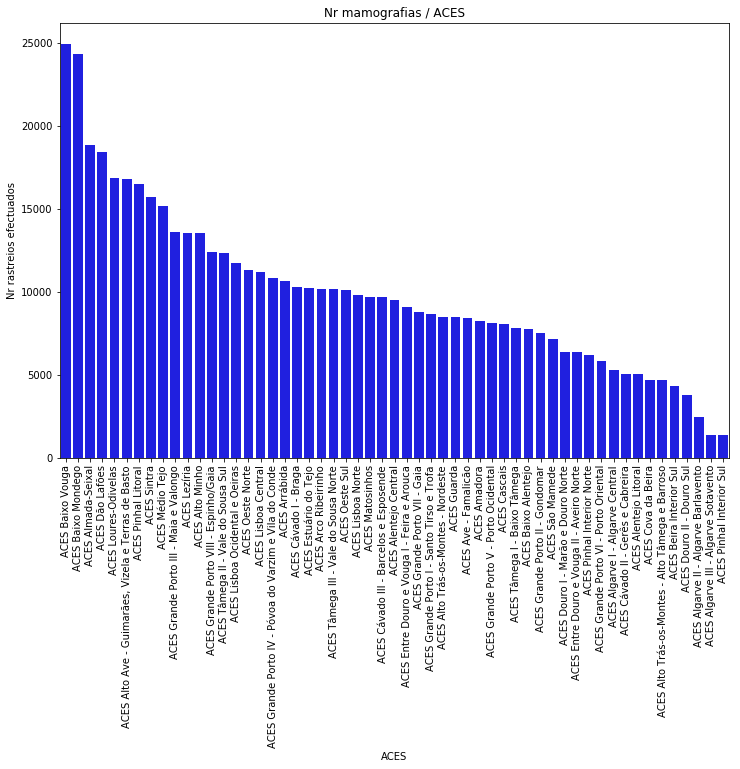

In [52]:
plt.figure(figsize=(12,8))

ax=sns.barplot(y=newdf.groupby('Aces').mean()['Nr_mamografias'].sort_values(ascending=False), x=newdf.groupby('Aces').mean()['Nr_mamografias'].sort_values(ascending=False).index, color='b')
plt.xticks(rotation=90)
ax.set_title('Nr mamografias / ACES')
ax.set_ylabel('Nr rastreios efectuados')
ax.set_xlabel('ACES')

In [53]:
newdf

,Região,Aces,Latitude,Longitude,Mes,Nr_colpocitologia,Nr_colon_recto_efectuado,Nr_mamografias,P_ut50_75_rastreio_CCR,P_m_50_70_mamog,P_m_25_60_CC
1,Região de Saúde do Alentejo,ACES Alentejo Litoral,38.384136,-8.513203,2014-01-01,6415,1790,2404,5.86193,18.27998,29.18562
2,Região de Saúde do Centro,ACES Pinhal Litoral,39.749533,-8.807683,2014-01-01,15718,16765,15003,20.75647,42.35743,23.40730
3,Região de Saúde LVT,ACES Almada-Seixal,38.667852,-9.187578,2014-01-01,30072,25237,14075,23.59238,29.10463,32.73642
4,Região de Saúde LVT,ACES Arco Ribeirinho,38.667208,-9.054333,2014-01-01,13424,10193,7924,14.92234,26.15095,23.38920
5,Região de Saúde LVT,ACES Sintra,38.751921,-9.275364,2014-01-01,21855,18519,11740,18.21517,25.30336,22.09651
...,...,...,...,...,...,...,...,...,...,...,...
4268,Região de Saúde Norte,ACES Tâmega II - Vale do Sousa Sul,41.154815,-8.216377,2020-07-01,27722,38109,13037,70.03529,53.15800,61.30744
4269,Região de Saúde do Alentejo,ACES Alentejo Central,38.844203,-7.582662,2020-07-01,15574,13604,8034,24.99219,34.60544,40.80916
4270,Região de Saúde do Alentejo,ACES Alentejo Litoral,38.384136,-8.513203,2020-07-01,7330,7964,3043,25.13572,22.74630,34.23314
4271,Região de Saúde do Algarve,ACES Algarve III - Algarve Sotavento,37.383008,-7.729328,2020-07-01,6255,8508,2311,41.10343,27.49227,47.48349


In [58]:
tmp1=newdf.groupby('Mes').mean().drop(['Latitude', 'Longitude'],axis=1)
tmp1

,Nr_colpocitologia,Nr_colon_recto_efectuado,Nr_mamografias,P_ut50_75_rastreio_CCR,P_m_50_70_mamog,P_m_25_60_CC
Mes,,,,,,
2014-01-01,15995.563636,13582.927273,7298.745455,24.439052,28.834428,34.398797
2014-02-01,16465.890909,14117.872727,7782.436364,25.397345,30.620982,35.366592
2014-03-01,16981.436364,14952.872727,8301.309091,26.824815,32.572306,36.470053
2014-04-01,17436.145455,15505.490909,8740.581818,27.819625,34.252840,37.416059
2014-05-01,17991.236364,16203.963636,9333.509091,29.086625,36.537280,38.524987
...,...,...,...,...,...,...
2020-03-01,17893.472727,27085.545455,8834.800000,45.410567,33.613012,40.311526
2020-04-01,18036.054545,27154.436364,8909.909091,45.585671,33.889817,40.690716
2020-05-01,18116.581818,27372.690909,9737.763636,46.041922,37.339004,40.928170


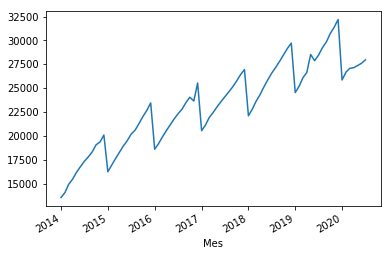

In [59]:
tmp1['Nr_colon_recto_efectuado'].plot()

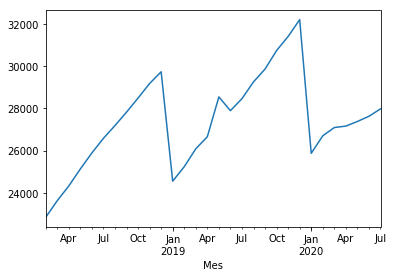

In [68]:
tmp1[tmp1.index>'2018' ]['Nr_colon_recto_efectuado'].plot()

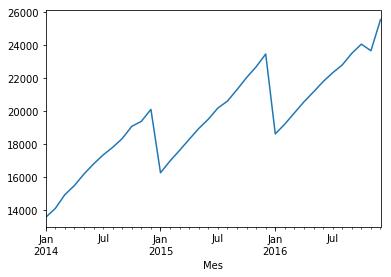

In [79]:
tmp1['Nr_colon_recto_efectuado'][:36].plot()

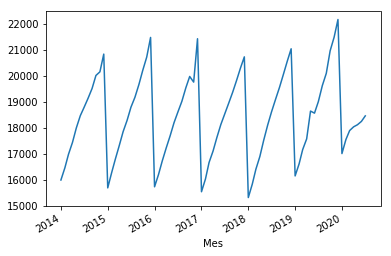

In [69]:
tmp1['Nr_colpocitologia'].plot()

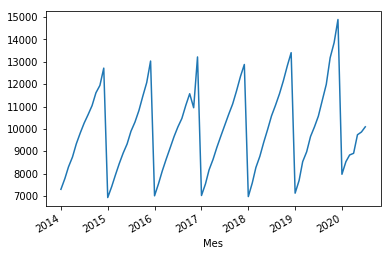

In [80]:
tmp1['Nr_mamografias'].plot()

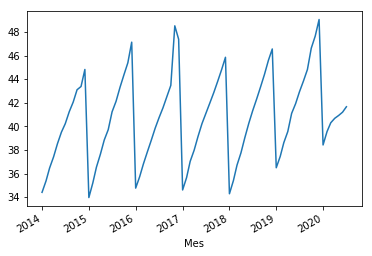

In [88]:
tmp1['P_m_25_60_CC'].plot()

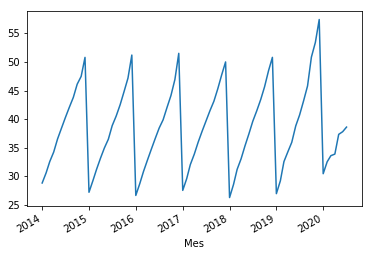

In [89]:
tmp1['P_m_50_70_mamog'].plot()

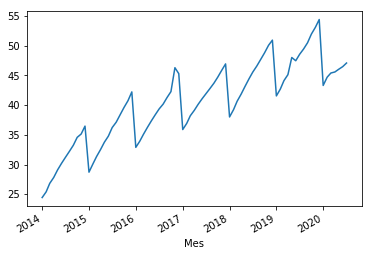

In [90]:
tmp1['P_ut50_75_rastreio_CCR'].plot()

In [91]:
#It's all seasonal data
# Let's try to model it 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [92]:
#Let's use the tmp1['Nr_colon_recto_efectuado']

In [94]:
logts=tmp1['Nr_colon_recto_efectuado'].apply(lambda x: np.log(x))

In [95]:
logts

Mes
2014-01-01     9.516569
2014-02-01     9.555197
2014-03-01     9.612659
2014-04-01     9.648949
2014-05-01     9.693011
                ...    
2020-03-01    10.206755
2020-04-01    10.209296
2020-05-01    10.217301
2020-06-01    10.226251
2020-07-01    10.238823
Name: Nr_colon_recto_efectuado, Length: 78, dtype: float64

In [98]:
def adfuller_clean(ts):
    t=adfuller(ts)
    return pd.Series(t[0:4], ['adf' , 'pvalue','usedlag','nobs'])
    
adfuller_clean(logts)

adf        -3.455500
pvalue      0.009206
usedlag    12.000000
nobs       65.000000
dtype: float64

In [99]:
#Not stationary! Let's differenciate

In [105]:
diff_1=logts-logts.shift(1)

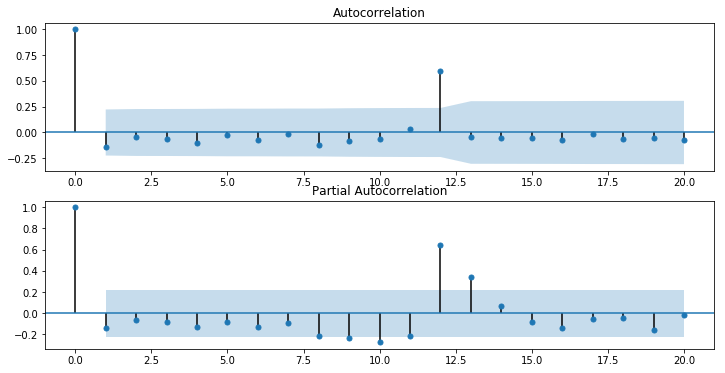

In [113]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(211)
fig=plot_acf(diff_1.dropna().values, lags=20, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(diff_1.dropna().values, lags=20, ax=ax2)


In [115]:
adfuller_clean(diff_1.dropna())

adf        -1.835805
pvalue      0.362836
usedlag    12.000000
nobs       64.000000
dtype: float64

In [132]:
diff_2=diff_1-diff_1.shift(1)

In [133]:
adfuller_clean(diff_2.dropna())

adf       -1.572763e+01
pvalue     1.300981e-28
usedlag    0.000000e+00
nobs       7.500000e+01
dtype: float64

In [148]:
p1=logts[logts.index > '2017']

In [150]:
p2=logts[logts.index<'2017']


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


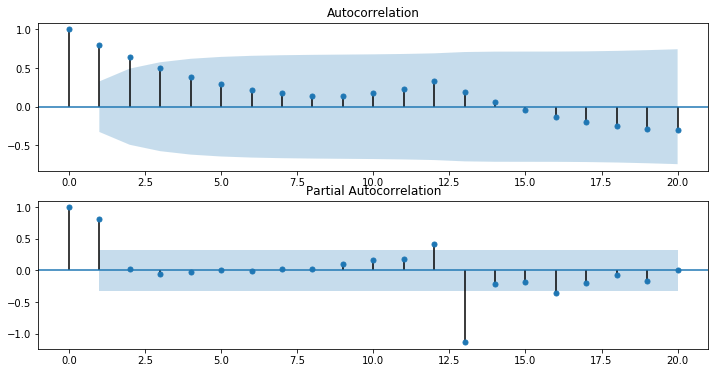

In [153]:
#p2

fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(211)
fig=plot_acf(p2.dropna().values, lags=20, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(p2.dropna().values, lags=20, ax=ax2)

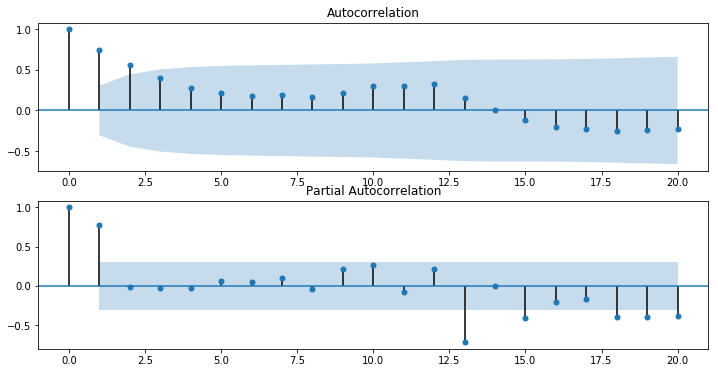

In [154]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(211)
fig=plot_acf(p1.dropna().values, lags=20, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(p1.dropna().values, lags=20, ax=ax2)

In [ ]:
from statsmodels.tsa. import 